In [1]:
import pandas as pd
import os
import glob

# 获取当前文件夹中所有的CSV文件
csv_files = glob.glob('*.csv')

# 创建一个字典来存储所有的DataFrame
dataframes = {}

# 遍历所有CSV文件并加载数据
for file in csv_files:
    print(f"正在加载文件: {file}")
    df_temp = pd.read_csv(file)
    # 添加一个列来标识数据来源
    df_temp['source_file'] = file
    # 使用文件名作为字典的键来存储DataFrame
    dataframes[file] = df_temp

# 如果找到了文件，则打印加载信息
if dataframes:
    print(f"成功加载了 {len(csv_files)} 个文件")
    for file, df in dataframes.items():
        print(f"文件 {file} 包含 {len(df)} 行数据")
else:
    print("未找到CSV文件")


正在加载文件: 20250518_202902.csv
正在加载文件: 20250518_202926.csv
正在加载文件: 20250518_202938.csv
正在加载文件: 20250518_202955.csv
正在加载文件: 20250518_203018.csv
正在加载文件: 20250518_203033.csv
正在加载文件: 20250518_203045.csv
成功加载了 7 个文件
文件 20250518_202902.csv 包含 129 行数据
文件 20250518_202926.csv 包含 129 行数据
文件 20250518_202938.csv 包含 129 行数据
文件 20250518_202955.csv 包含 129 行数据
文件 20250518_203018.csv 包含 129 行数据
文件 20250518_203033.csv 包含 129 行数据
文件 20250518_203045.csv 包含 129 行数据


In [2]:
# 查看每个数据集的基本信息和结构
for file_name, df in dataframes.items():
    print(f"\n文件: {file_name} 的基本信息")
    
    # 显示数据框的基本信息
    print(f"数据维度: {df.shape}")
    print("\n列名:")
    for col in df.columns:
        print(f"- {col}")
    
    # 显示数据类型
    print("\n数据类型:")
    print(df.dtypes)
    
    # 显示数据的前几行
    print("\n数据预览:")
    print(df.head())
    
    # 检查缺失值
    missing_values = df.isnull().sum()
    if missing_values.sum() > 0:
        print("\n缺失值统计:")
        print(missing_values[missing_values > 0])
    else:
        print("\n数据中没有缺失值")
    
    # 数值列的基本统计
    numeric_cols = df.select_dtypes(include=['number']).columns
    if len(numeric_cols) > 0:
        print("\n数值列的基本统计:")
        print(df[numeric_cols].describe())
    
    print("-" * 80)  # 分隔线



文件: 20250518_202902.csv 的基本信息
数据维度: (129, 6)

列名:
- Frequency
- Before
- After
- Absolute_Change
- Percent_Change
- source_file

数据类型:
Frequency          float64
Before             float64
After              float64
Absolute_Change    float64
Percent_Change     float64
source_file         object
dtype: object

数据预览:
   Frequency       Before        After  Absolute_Change  Percent_Change  \
0   0.000000  5483.214829  5239.903080      -243.311749       -4.437392   
1   0.028382  1403.004465  1348.713306       -54.291158       -3.869635   
2   0.056764    14.192087    15.120647         0.928560        6.542801   
3   0.085145     3.549054     3.855442         0.306388        8.632952   
4   0.113527     2.271622     2.411140         0.139518        6.141787   

           source_file  
0  20250518_202902.csv  
1  20250518_202902.csv  
2  20250518_202902.csv  
3  20250518_202902.csv  
4  20250518_202902.csv  

数据中没有缺失值

数值列的基本统计:
        Frequency       Before        After  Absolute_Chang

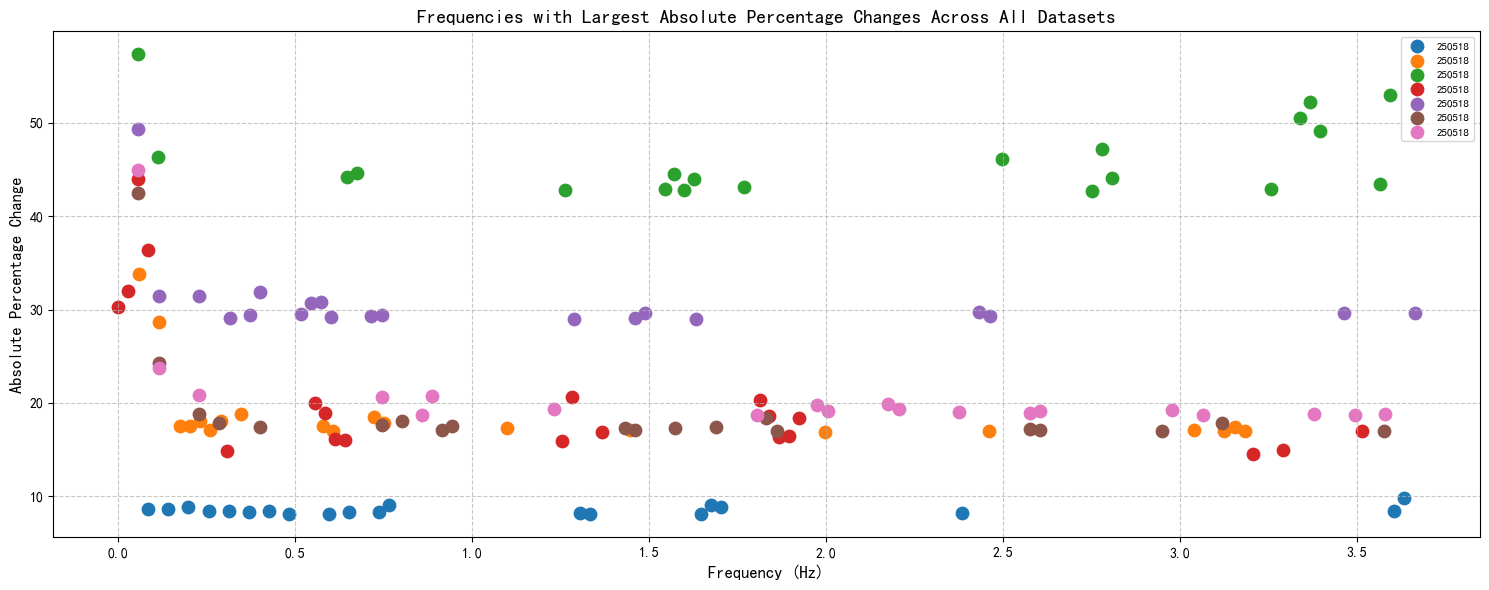

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib
matplotlib.rcParams['font.family'] = ['SimHei', 'sans-serif']  # Set Chinese font

# Create a dictionary to store analysis results for each dataset
analysis_results = {}

# Analyze all datasets
for file_name, df in dataframes.items():
    
    # Sort by absolute percentage change
    df['Abs_Percent_Change'] = abs(df['Percent_Change'])
    df_sorted = df.sort_values(by='Abs_Percent_Change', ascending=False)
    
    # Get top 20 frequencies with the largest absolute percentage changes
    top_changes = df_sorted.head(20)
    
    # Store analysis results
    analysis_results[file_name] = {
        'top_changes': top_changes,
        'mean_change': top_changes['Abs_Percent_Change'].mean(),
        'data': df  # Add original data to results dictionary
    }
    
# Create a figure
fig, ax = plt.subplots(figsize=(15, 6))

# Set different colors for different datasets
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Plot scatter points for frequencies with largest absolute percentage changes
for i, (file_name, results) in enumerate(analysis_results.items()):
    top_changes = results['top_changes']
    # Use part of the filename as label
    label = file_name.split('_')[0][-6:] if '_' in file_name else file_name[:6]
    
    for _, row in top_changes.iterrows():
        ax.scatter(row['Frequency'], row['Abs_Percent_Change'], 
                  color=colors[i % len(colors)], 
                  s=80, 
                  label=f'{label}' if _ == top_changes.index[0] else "")

ax.set_title('Frequencies with Largest Absolute Percentage Changes Across All Datasets', fontsize=14)
ax.set_xlabel('Frequency (Hz)', fontsize=12)
ax.set_ylabel('Absolute Percentage Change', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(loc='upper right', fontsize=8)

# Adjust layout
plt.tight_layout()
plt.show()